In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
batch_size=32
img_size=256
channels=3
epochs=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

(32, 256, 256, 3)
[1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0]


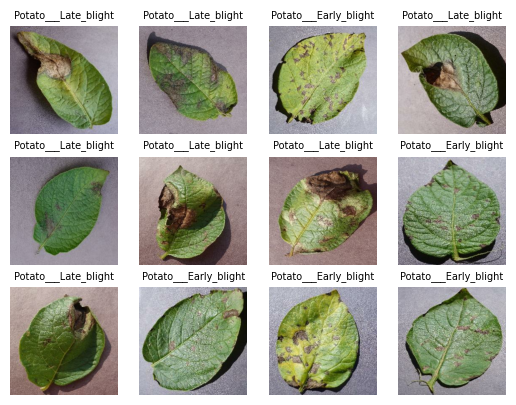

In [5]:
for img_batch, lbl_batch in dataset.take(1):
    print(img_batch.shape)
    print(lbl_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[lbl_batch[i]], fontsize=7)

In [6]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(dataset)

train_dataset = dataset.take(int(dataset_size*train_ratio))
rem_dataset = dataset.skip(int(dataset_size*train_ratio))
val_dataset = rem_dataset.take(int(dataset_size*val_ratio))
test_dataset = rem_dataset.skip(int(dataset_size*val_ratio))

In [7]:
len(train_dataset), len(val_dataset), len(test_dataset)

(54, 6, 8)

In [8]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)    
val_dataset = val_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)    
test_dataset = test_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)    

In [9]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(img_size, img_size),
    layers.Rescaling(1./255)
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [11]:
input_shape=(batch_size,img_size,img_size,3)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model.build(input_shape=input_shape)
model.summary()

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    verbose=1,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9574 - loss: 0.1242 - val_accuracy: 0.9219 - val_loss: 0.2583
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9826 - loss: 0.0604 - val_accuracy: 0.9010 - val_loss: 0.2779
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9820 - loss: 0.0540 - val_accuracy: 0.8698 - val_loss: 0.6547
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9627 - loss: 0.0945 - val_accuracy: 0.9427 - val_loss: 0.1455
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9790 - loss: 0.0550 - val_accuracy: 0.9688 - val_loss: 0.1474
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9806 - loss: 0.0619 - val_accuracy: 0.9167 - val_loss: 0.2433
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9866 - loss: 0.0405 - val_accuracy: 0.9271 - val_loss: 0.2394
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9827 - loss: 0.0548 - val_accuracy: 0.9479 - val_loss:

In [21]:
model.save_weights("potato.weights.h5")

In [22]:
scores = model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.9225 - loss: 0.1535


In [23]:
acc = list(history.history['accuracy'])
val_acc = list(history.history['val_accuracy'])

loss = list(history.history['loss'])
val_loss = list(history.history['val_loss'])

In [24]:
history.history.keys()
values = len(history.history['loss'])
values

10

Text(0.5, 1.0, 'Training and Validation Loss')

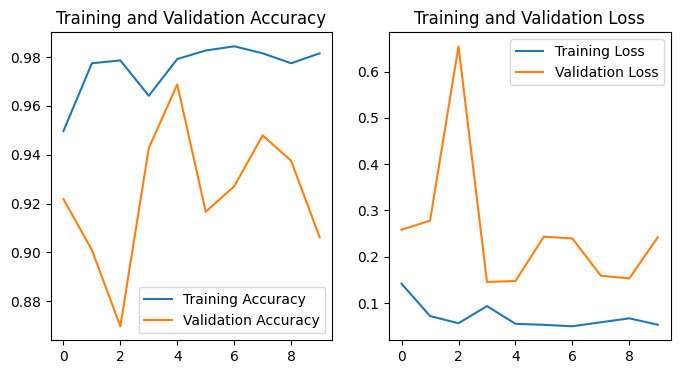

In [25]:
import numpy as np
values = range(len(history.history['loss']))
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(values,acc,label="Training Accuracy")
plt.plot(values,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(values,loss,label="Training Loss")
plt.plot(values,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted: 0
Actual: 0


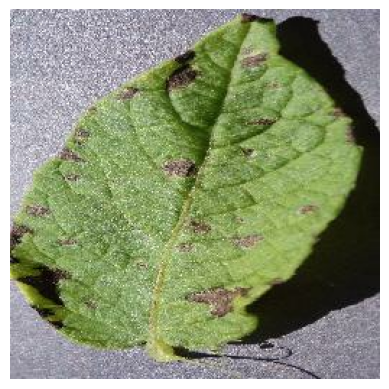

In [29]:
import numpy as np
for img_batch, lbl_batch in test_dataset.take(1):
    first_img = img_batch[0].numpy().astype("uint8")
    plt.imshow(first_img)
    plt.axis("off")
    print(f"Predicted: {np.argmax(model.predict(img_batch)[0])}")
    print(f"Actual: {lbl_batch[0].numpy()}")

In [31]:
def predict(model,img):
    img_arr = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arr = tf.expand_dims(img_arr, 0)

    predictions = model.predict(img_arr)

    prediction_class = class_names[np.argmax(predictions[0])]
    confidence = np.round(100 * np.max(predictions[0]), 2)
    return prediction_class, confidence

In [34]:
model.save("potatoModel.keras")

In [35]:
model.save("potatoModel.h5")